In [70]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [3]:
dataset =pd.read_csv('Iris.csv')
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.shape

(150, 6)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

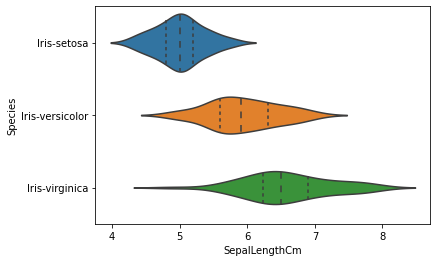

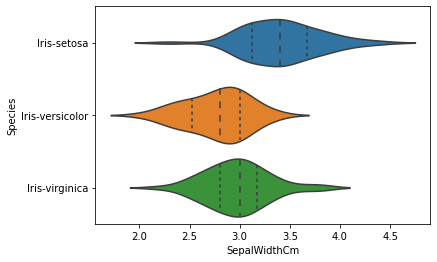

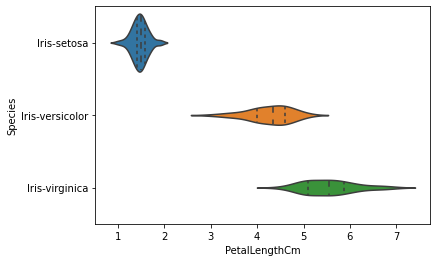

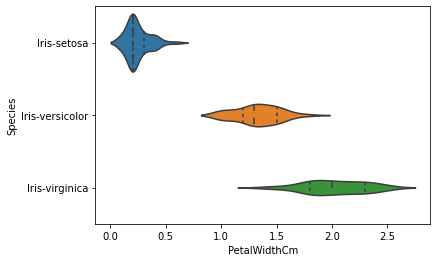

In [14]:
sns.violinplot(y='Species', x='SepalLengthCm', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=dataset, inner='quartile')
plt.show()

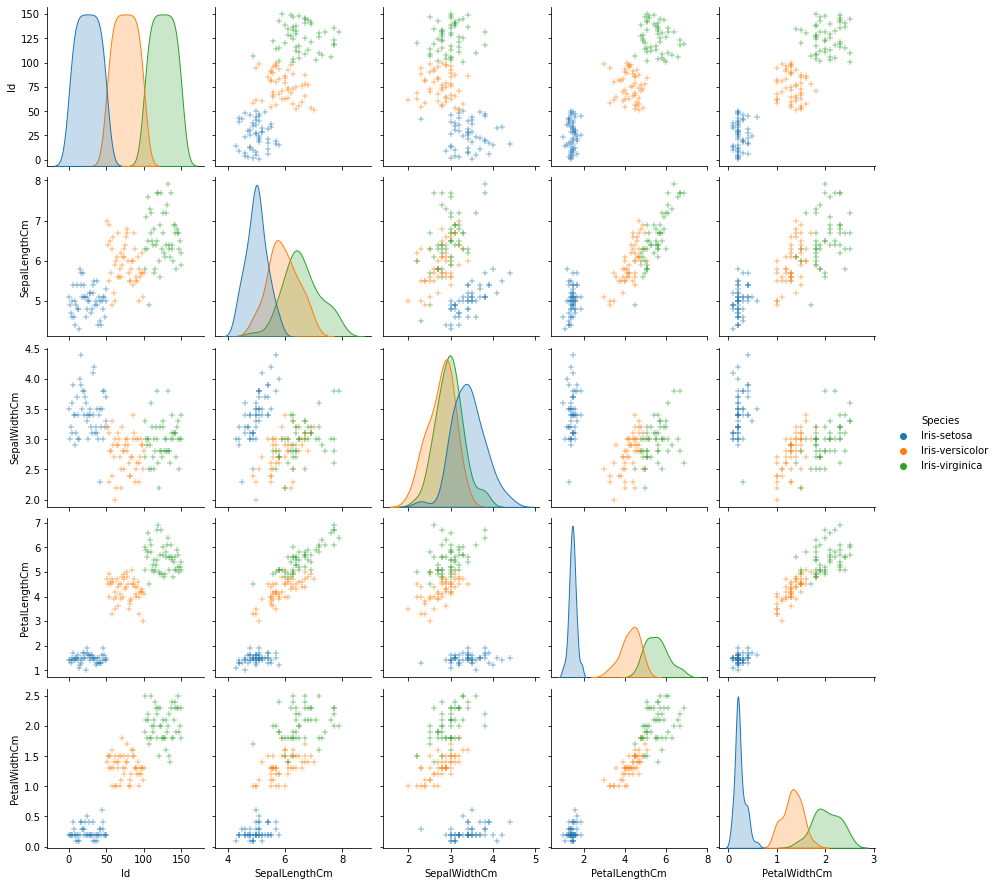

In [17]:
sns.pairplot(dataset, hue='Species', markers='+')
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

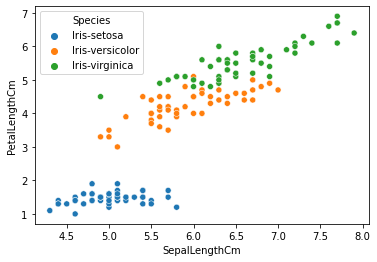

In [20]:
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data= dataset,hue='Species')

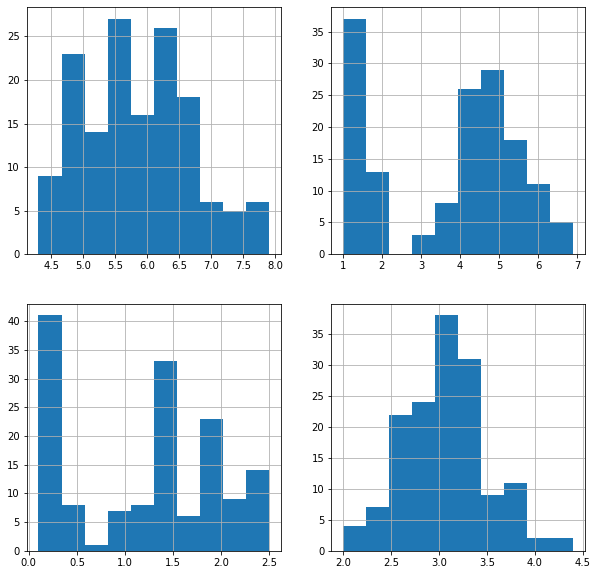

In [22]:
def histplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    dataset['SepalLengthCm'].hist(ax=axes[0][0])
    dataset['PetalLengthCm'].hist(ax=axes[0][1])
    dataset['PetalWidthCm'].hist(ax=axes[1][0])
    dataset['SepalWidthCm'].hist(ax=axes[1][1])
    plt.show()
    
histplots()

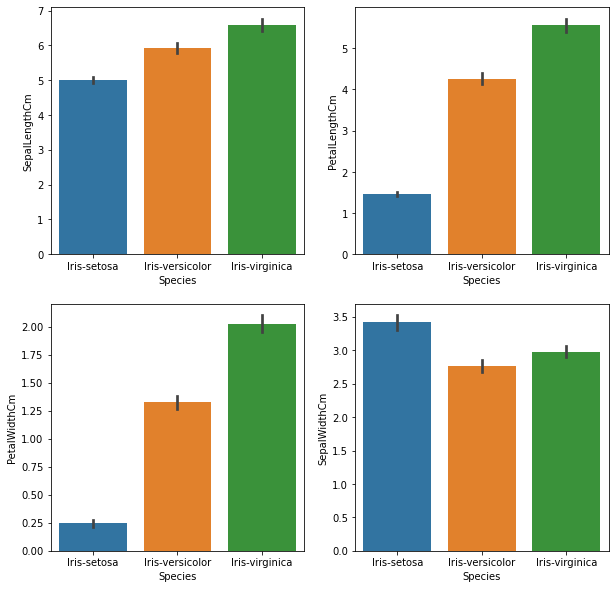

In [24]:
def barplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    sns.barplot(x=dataset.Species,y=dataset['SepalLengthCm'],ax=axes[0][0])
    sns.barplot(x=dataset.Species,y=dataset['PetalLengthCm'],ax=axes[0][1])
    sns.barplot(x=dataset.Species,y=dataset['PetalWidthCm'],ax=axes[1][0])
    sns.barplot(x=dataset.Species,y=dataset['SepalWidthCm'],ax=axes[1][1])
    plt.show()
    
barplots()

In [26]:
dataset.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


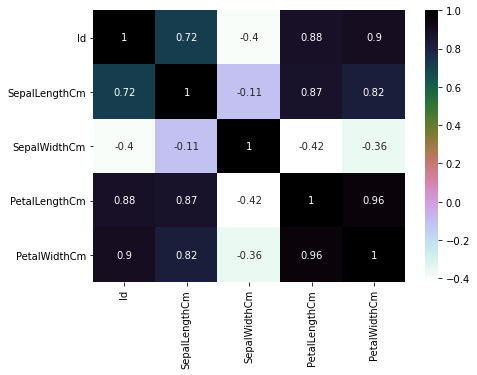

In [25]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [40]:
X = dataset.drop(['Species'], axis=1)
Y = dataset['Species']
print(f'X shape: {X.shape} | Y shape: {y.shape} ')

X shape: (150, 5) | Y shape: (150,) 


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(100, 5)
(50, 5)
(100,)
(50,)


In [72]:
#LINEAR REGRESSION
model = LinearRegression()

model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

sc_lr = round(model.score(X_test, Y_test) * 100 , 2)

print("Accuracy: ", str(sc_lr) , " %" )

ValueError: could not convert string to float: 'Iris-versicolor'

In [64]:
#LOGISTIC REGRESSION

model2 = LogisticRegression()

model2.fit(X_train,Y_train)

sc_logr = round(model2.score(X_test, Y_test) * 100,2)

print("Accuracy: ", str(sc_logr) ,  " %")

Accuracy:  100.0  %


C:\Users\7024d\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
#NAIVE BAYES

nb = GaussianNB()

nb.fit(X_train,Y_train)

y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("Accuracy: "+str(score_nb)+" %")

print(classification_report(Y_test, y_pred_nb))

Accuracy: 100.0 %
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        22
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [68]:
#KNN CLASSIFIER

model3 = KNeighborsClassifier()

model3.fit(X_train,Y_train)

sc_knn = round(model3.score(X_test, Y_test) * 100,2)

print("Accuracy: ", str(sc_knn) , " %")

Accuracy:  98.0  %


In [71]:
#SVM 

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

y_pred_svm = sv.predict(X_test)

sc_svm = round(accuracy_score(y_pred_svm,Y_test)*100,2)

print("Accuracy: "+ str(sc_svm) +" %")

print(classification_report(Y_test, y_pred_svm))

Accuracy: 100.0 %
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        22
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

